## Tasca 6: Visualització gràfica d'un dataset - Eduardo Baffi

#### Nivell 1

In [1]:
# - Exercici 1
# Resumeix gràficament el data set DelayedFlights.csv

#Crea almenys una visualització per:

#Una variable categòrica (UniqueCarrier)
#Una variable numèrica (ArrDelay)
#Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
#Dues variables numèriques (ArrDelay i DepDelay)
#Tres variables (ArrDelay, DepDelay i UniqueCarrier)
#Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

In [2]:
import pandas as pd

airlines_original_df = pd.read_csv('DelayedFlights.csv')
pd.options.display.max_columns = None           #Ver todas las columnas
airlines_original_df[:5]

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Iniciar limpieza de datos
# Datos faltantes por columna:
missing_data_count = airlines_original_df.isnull().sum()
missing_data_count

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [4]:
# Toal de líneas del DataFrame
total_rows = len(airlines_original_df.index)
total_rows

1936758

In [5]:
new_airlines_df = airlines_original_df.filter(['Month','DayofMonth','DayOfWeek','DepTime','ArrTime','UniqueCarrier','FlightNum','TailNum','ActualElapsedTime','AirTime','ArrDelay','DepDelay','Origin','Dest','Distance','Cancelled','Diverted'], axis=1)
new_airlines_df # Nuevo Dataframe - mantenidas solamente las columnas que interesan en este momento y excluías algunas que tenian muchos valores nulos

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted
0,1,3,4,2003.0,2211.0,WN,335,N712SW,128.0,116.0,-14.0,8.0,IAD,TPA,810,0,0
1,1,3,4,754.0,1002.0,WN,3231,N772SW,128.0,113.0,2.0,19.0,IAD,TPA,810,0,0
2,1,3,4,628.0,804.0,WN,448,N428WN,96.0,76.0,14.0,8.0,IND,BWI,515,0,0
3,1,3,4,1829.0,1959.0,WN,3920,N464WN,90.0,77.0,34.0,34.0,IND,BWI,515,0,0
4,1,3,4,1940.0,2121.0,WN,378,N726SW,101.0,87.0,11.0,25.0,IND,JAX,688,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12,13,6,1250.0,1617.0,DL,1621,N938DL,147.0,120.0,25.0,30.0,MSP,ATL,906,0,0
1936754,12,13,6,657.0,904.0,DL,1631,N3743H,127.0,78.0,75.0,57.0,RIC,ATL,481,0,0
1936755,12,13,6,1007.0,1149.0,DL,1631,N909DA,162.0,122.0,99.0,80.0,ATL,IAH,689,0,0
1936756,12,13,6,1251.0,1446.0,DL,1639,N646DL,115.0,89.0,9.0,11.0,IAD,ATL,533,0,0


In [6]:
new_airlines_df.isnull().sum()

Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
ArrTime              7110
UniqueCarrier           0
FlightNum               0
TailNum                 5
ActualElapsedTime    8387
AirTime              8387
ArrDelay             8387
DepDelay                0
Origin                  0
Dest                    0
Distance                0
Cancelled               0
Diverted                0
dtype: int64

In [7]:
# Líneas con valor nulo excluídas
new_airlines_df=new_airlines_df.dropna(axis=0, subset=['ArrTime','TailNum','ActualElapsedTime','AirTime','ArrDelay'])
new_airlines_df.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
ArrTime              0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
Cancelled            0
Diverted             0
dtype: int64

In [8]:
new_airlines_df.duplicated().sum() # Líneas duplicadas

2

In [9]:
flights_df = new_airlines_df.append(new_airlines_df)
flights_df.shape

(3856736, 17)

In [10]:
flights_df = flights_df.drop_duplicates()
flights_df.shape

(1928366, 17)

In [11]:
flights_df.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
ArrTime              0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
Cancelled            0
Diverted             0
dtype: int64

In [12]:
# A partir de aqui empezamos los gráficos
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Variable categòrica - UniqueCarrier
# Numero de vuelos por aerolínea
Carrier_counts = flights_df['UniqueCarrier'].value_counts()
Carrier_counts

WN    376201
AA    190910
MQ    141223
UA    140904
OO    131780
DL    113728
XE    103147
CO     99731
US     98007
EV     81762
NW     78843
FL     70969
YV     66769
B6     54925
OH     52451
9E     51568
AS     39010
F9     28222
HA      7472
AQ       744
Name: UniqueCarrier, dtype: int64

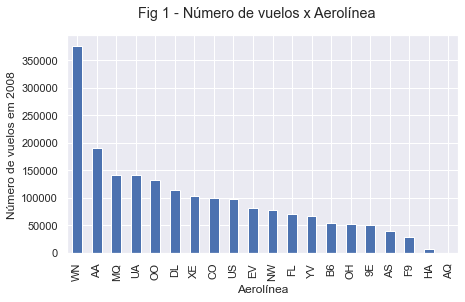

In [13]:
# Gráficos de barras 
sns.set(rc={'figure.figsize':(7,4)})
plt.xlabel('Aerolínea')
plt.ylabel('Número de vuelos em 2008')
plt.suptitle('Fig 1 - Número de vuelos x Aerolínea')
Carrier_counts.plot(kind='bar')
plt.savefig('exercici1_fig1.png')

In [14]:
Carrier_counts.index

Index(['WN', 'AA', 'MQ', 'UA', 'OO', 'DL', 'XE', 'CO', 'US', 'EV', 'NW', 'FL',
       'YV', 'B6', 'OH', '9E', 'AS', 'F9', 'HA', 'AQ'],
      dtype='object')

In [15]:
Carrier_counts.values

array([376201, 190910, 141223, 140904, 131780, 113728, 103147,  99731,
        98007,  81762,  78843,  70969,  66769,  54925,  52451,  51568,
        39010,  28222,   7472,    744], dtype=int64)

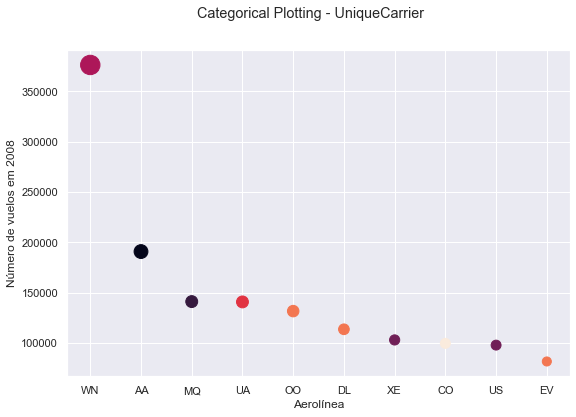

In [76]:
# Scatter Plot - Variable categòrica UniqueCarrier
sns.set(rc={'figure.figsize':(9,6)})
colors = np.random.randint(10, size=(10))
plt.scatter(Carrier_counts[:10].index, Carrier_counts[:10].values, c = colors,  s=Carrier_counts[:10].values/1000)
plt.xlabel('Aerolínea')
plt.ylabel('Número de vuelos em 2008')
plt.suptitle('Categorical Plotting - UniqueCarrier')
plt.savefig('exercici1_fig2.png', bbox_inches='tight')
#plt.show()

In [17]:
#Variable numèrica - ArrDelay
Arrdelays_counts = flights_df['ArrDelay'].value_counts()
Arrdelays_counts

 10.0      36291
 8.0       35902
 7.0       35869
 9.0       35782
 6.0       35522
           ...  
 1177.0        1
 978.0         1
 989.0         1
 1291.0        1
-61.0          1
Name: ArrDelay, Length: 1128, dtype: int64

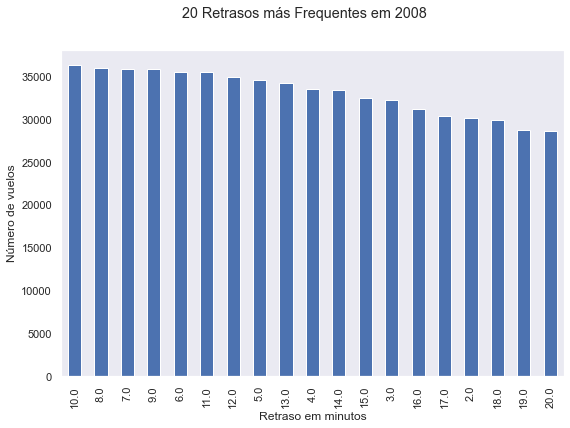

In [77]:
sns.set(rc={'figure.figsize':(9,6)})
plt.xlabel('Retraso em minutos')
plt.ylabel('Número de vuelos')
plt.suptitle('20 Retrasos más Frequentes em 2008')
Arrdelays_counts[:20].plot(kind='bar')
plt.grid()
plt.savefig('exercici1_fig3.png', bbox_inches='tight')

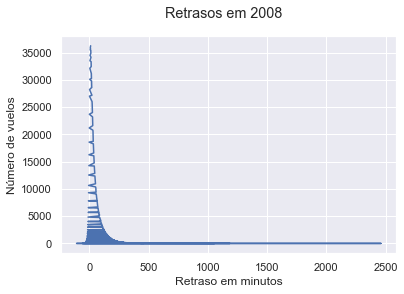

In [78]:
sns.set(rc={'figure.figsize':(6,4)})
plt.xlabel('Retraso em minutos')
plt.ylabel('Número de vuelos')
plt.suptitle('Retrasos em 2008')
Arrdelays_counts.plot()
plt.savefig('exercici1_fig4.png', bbox_inches='tight')
plt.show()

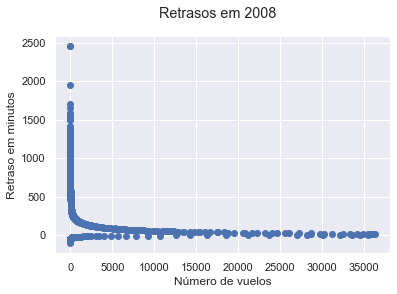

In [79]:
y = Arrdelays_counts.index
x = Arrdelays_counts.values
plt.scatter(x, y)

plt.ylabel('Retraso em minutos')
plt.xlabel('Número de vuelos')
plt.suptitle('Retrasos em 2008')
plt.savefig('exercici1_fig5.png', bbox_inches='tight')
#plt.show()

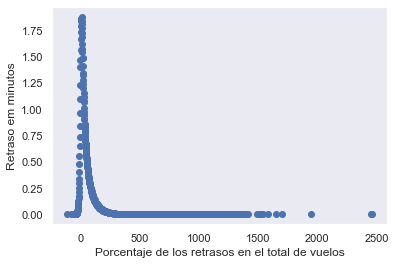

In [80]:
# Distribuición 
total_flights = flights_df.shape[0]
z = (Arrdelays_counts.values/total_flights)*100
plt.scatter(y, z)
plt.ylabel('Retraso em minutos')
plt.xlabel('Porcentaje de los retrasos en el total de vuelos')
plt.grid()
plt.savefig('exercici1_fig6.png', bbox_inches='tight')
plt.show()

#Los retrasos en la llegada están concentrado entre 0 y 50 minutos

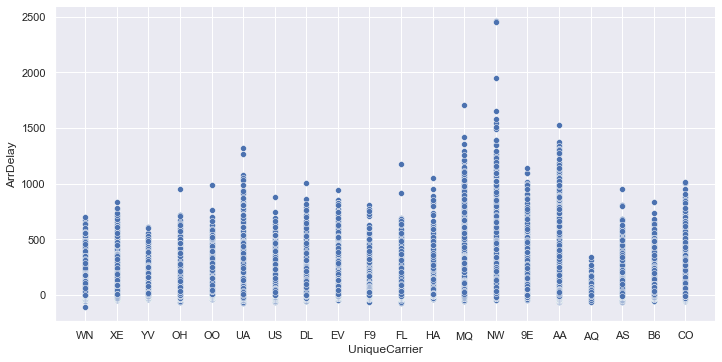

In [81]:
#Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
import seaborn as sns
sns.set(rc={'figure.figsize':(10,7)})
sns.relplot(x = flights_df['UniqueCarrier'], y = flights_df['ArrDelay'], data=flights_df, height=5, aspect=2)
plt.savefig('exercici1_fig7.png', bbox_inches='tight')

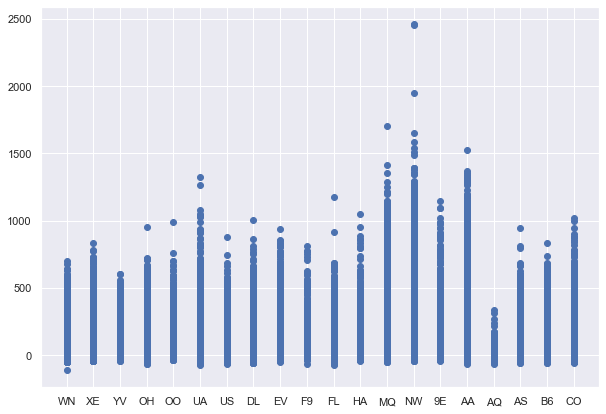

In [82]:
# Resultado con Matplotlib
e = flights_df['UniqueCarrier']
f = flights_df['ArrDelay']
plt.scatter(e,f)
plt.savefig('exercici1_fig8.png', bbox_inches='tight')
#plt.show()

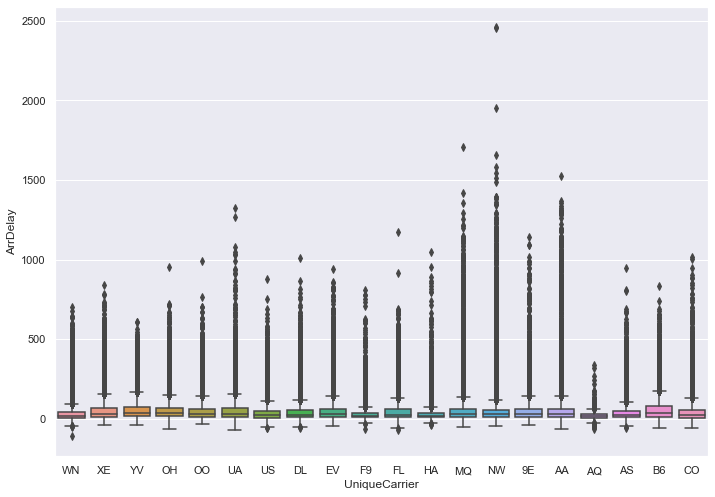

In [83]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  # Comando para hacer el gráfico más grande
sns.boxplot(x = flights_df['UniqueCarrier'], y = flights_df['ArrDelay'])
plt.savefig('exercici1_fig9.png', bbox_inches='tight')

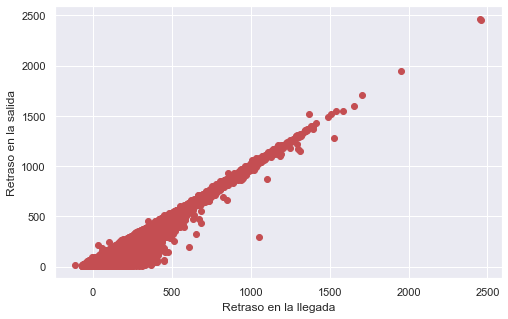

In [84]:
#Dues variables numèriques (ArrDelay i DepDelay)
sns.set(rc={'figure.figsize':(8,5)})
y = flights_df['DepDelay']
x = flights_df['ArrDelay']
plt.scatter(x, y, c='r')
plt.ylabel('Retraso en la salida')
plt.xlabel('Retraso en la llegada')
plt.savefig('exercici1_fig10.png', bbox_inches='tight')
#plt.show()

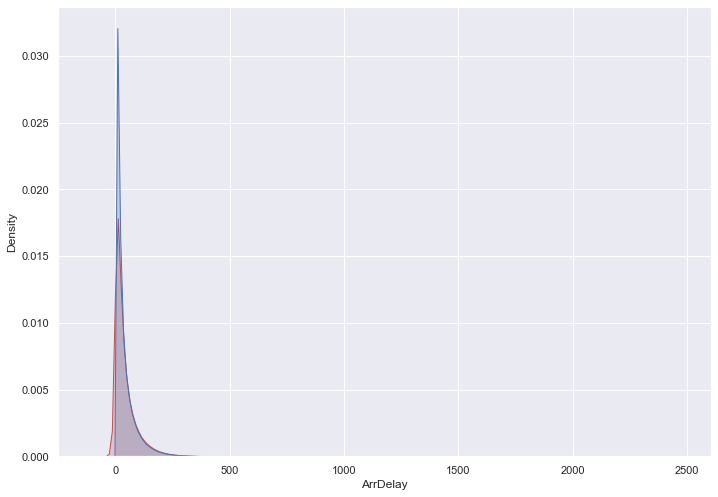

In [85]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="darkgrid")
fig = sns.kdeplot(flights_df['ArrDelay'], shade=True, color="r")
fig = sns.kdeplot(flights_df['DepDelay'], shade=True, color="b")
plt.savefig('exercici1_fig11.png', bbox_inches='tight')
#plt.show()

In [27]:
# Los gráficos empezaron a tardar mucho para generar las imágene
# Entonces voy a limpiar más el dataset y dividirlo para que pueda generar los gráficos

In [28]:
flights_df

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted
0,1,3,4,2003.0,2211.0,WN,335,N712SW,128.0,116.0,-14.0,8.0,IAD,TPA,810,0,0
1,1,3,4,754.0,1002.0,WN,3231,N772SW,128.0,113.0,2.0,19.0,IAD,TPA,810,0,0
2,1,3,4,628.0,804.0,WN,448,N428WN,96.0,76.0,14.0,8.0,IND,BWI,515,0,0
3,1,3,4,1829.0,1959.0,WN,3920,N464WN,90.0,77.0,34.0,34.0,IND,BWI,515,0,0
4,1,3,4,1940.0,2121.0,WN,378,N726SW,101.0,87.0,11.0,25.0,IND,JAX,688,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12,13,6,1250.0,1617.0,DL,1621,N938DL,147.0,120.0,25.0,30.0,MSP,ATL,906,0,0
1936754,12,13,6,657.0,904.0,DL,1631,N3743H,127.0,78.0,75.0,57.0,RIC,ATL,481,0,0
1936755,12,13,6,1007.0,1149.0,DL,1631,N909DA,162.0,122.0,99.0,80.0,ATL,IAH,689,0,0
1936756,12,13,6,1251.0,1446.0,DL,1639,N646DL,115.0,89.0,9.0,11.0,IAD,ATL,533,0,0


In [29]:
flights2_df = flights_df.filter(['UniqueCarrier','AirTime','ArrDelay','DepDelay'], axis=1)
flights2_df

,UniqueCarrier,AirTime,ArrDelay,DepDelay
0,WN,116.0,-14.0,8.0
1,WN,113.0,2.0,19.0
2,WN,76.0,14.0,8.0
3,WN,77.0,34.0,34.0
4,WN,87.0,11.0,25.0
...,...,...,...,...
1936753,DL,120.0,25.0,30.0
1936754,DL,78.0,75.0,57.0
1936755,DL,122.0,99.0,80.0
1936756,DL,89.0,9.0,11.0


In [30]:
# Sample de toda la matriz original
flights2_df = flights2_df.sample(frac=1).reset_index(drop=True)
flights2_df

,UniqueCarrier,AirTime,ArrDelay,DepDelay
0,AA,414.0,14.0,22.0
1,WN,65.0,9.0,6.0
2,NW,221.0,17.0,16.0
3,AA,176.0,16.0,23.0
4,XE,74.0,13.0,22.0
...,...,...,...,...
1928361,DL,136.0,74.0,56.0
1928362,OO,60.0,2.0,6.0
1928363,DL,110.0,30.0,33.0
1928364,FL,73.0,4.0,7.0


In [31]:
flights2_df.shape

(1928366, 4)

In [32]:
# Subconjunto de 10% el dataset original
flights3_df = flights2_df.sample(frac=0.1)
flights3_df

,UniqueCarrier,AirTime,ArrDelay,DepDelay
163263,UA,127.0,206.0,113.0
1218054,WN,54.0,30.0,30.0
1505690,OO,24.0,46.0,48.0
805757,WN,49.0,109.0,113.0
839983,DL,240.0,74.0,55.0
...,...,...,...,...
515779,OH,143.0,47.0,45.0
1810812,OO,87.0,16.0,29.0
262335,CO,189.0,21.0,40.0
1381857,YV,52.0,35.0,21.0


In [33]:
flights3_df['UniqueCarrier'].value_counts()

WN    37458
AA    19054
MQ    14268
UA    14225
OO    13336
DL    11241
XE    10344
CO     9969
US     9703
EV     8123
NW     7812
FL     7111
YV     6661
B6     5419
OH     5282
9E     5273
AS     3951
F9     2866
HA      673
AQ       68
Name: UniqueCarrier, dtype: int64

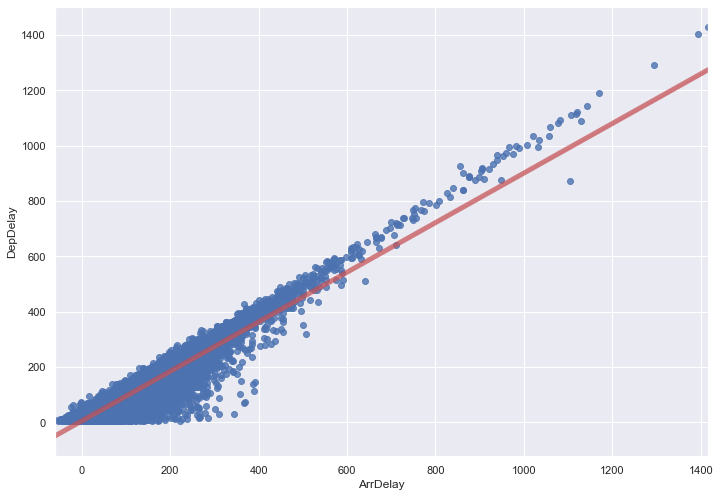

In [86]:
# Scatterplot
sns.regplot(x=flights3_df['ArrDelay'], y=flights3_df['DepDelay'], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.savefig('exercici1_fig12.png', bbox_inches='tight')
#plt.show()

In [35]:
# Retrasos concentrados entre 0 y 60 minutos
# 2d density plot
delays_lower60 = flights3_df[(flights3_df['ArrDelay']<=60) & (flights3_df['DepDelay']<=60)]
delays_lower60

,UniqueCarrier,AirTime,ArrDelay,DepDelay
1218054,WN,54.0,30.0,30.0
1505690,OO,24.0,46.0,48.0
675488,OO,83.0,12.0,10.0
1085459,FL,87.0,-7.0,8.0
208126,WN,58.0,56.0,56.0
...,...,...,...,...
515779,OH,143.0,47.0,45.0
1810812,OO,87.0,16.0,29.0
262335,CO,189.0,21.0,40.0
1381857,YV,52.0,35.0,21.0


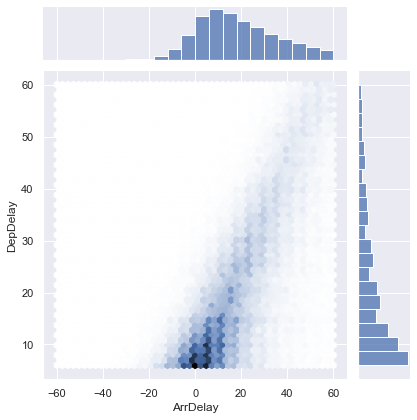

In [87]:
sns.jointplot(x=delays_lower60['ArrDelay'], y=delays_lower60['DepDelay'], kind='hex', marginal_kws=dict(bins=20, fill=True))
plt.savefig('exercici1_fig13.png', bbox_inches='tight')
plt.show()

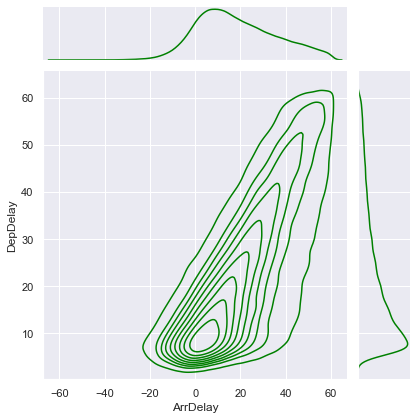

In [88]:
# Central plot com retrasos de salia y llegada hasta 60 minutos
sns.jointplot(x=delays_lower60['ArrDelay'], y=delays_lower60['DepDelay'], kind='kde', color="green")
plt.savefig('exercici1_fig14.png', bbox_inches='tight')

In [38]:
#Tres variables (ArrDelay, DepDelay i UniqueCarrier)

In [39]:
flights3_df['UniqueCarrier'].value_counts

<bound method IndexOpsMixin.value_counts of 163263     UA
1218054    WN
1505690    OO
805757     WN
839983     DL
           ..
515779     OH
1810812    OO
262335     CO
1381857    YV
530091     WN
Name: UniqueCarrier, Length: 192837, dtype: object>

In [40]:
three_variables = flights3_df[['ArrDelay','DepDelay','UniqueCarrier']].copy()
three_variables

,ArrDelay,DepDelay,UniqueCarrier
163263,206.0,113.0,UA
1218054,30.0,30.0,WN
1505690,46.0,48.0,OO
805757,109.0,113.0,WN
839983,74.0,55.0,DL
...,...,...,...
515779,47.0,45.0,OH
1810812,16.0,29.0,OO
262335,21.0,40.0,CO
1381857,35.0,21.0,YV


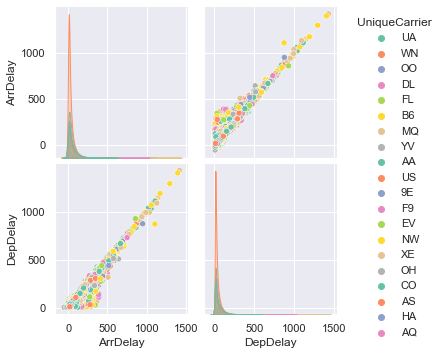

In [89]:
# Pairplot de las 3 variables
sns.pairplot(three_variables, kind="scatter", hue="UniqueCarrier", palette="Set2")
plt.savefig('exercici1_fig15.png', bbox_inches='tight')
#plt.show()

In [42]:
# Dataset para vuelos de la aerolínea AA com el máximmo de 60 minutos de retraso.
AA_variables = flights3_df[(flights3_df['ArrDelay']<=60) & (flights3_df['DepDelay']<=60) & (flights3_df['UniqueCarrier']=='AA')]
AA_variables
#delays_lower60 = flights3_df[(flights3_df['ArrDelay']<=60) & (flights3_df['DepDelay']<=60)]

,UniqueCarrier,AirTime,ArrDelay,DepDelay
791037,AA,148.0,41.0,42.0
125169,AA,89.0,12.0,25.0
852696,AA,152.0,13.0,25.0
614335,AA,161.0,36.0,25.0
1753912,AA,39.0,16.0,27.0
...,...,...,...,...
1529274,AA,190.0,19.0,22.0
115951,AA,87.0,-13.0,6.0
914218,AA,39.0,16.0,25.0
363777,AA,123.0,-1.0,8.0


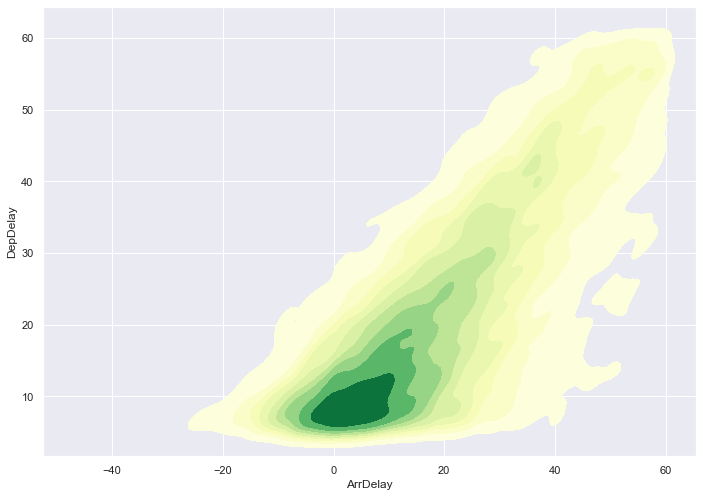

In [90]:
# Contour plot
sns.kdeplot(x=AA_variables['ArrDelay'], y=AA_variables['DepDelay'], cmap="YlGn", shade=True, bw_adjust=.5)
plt.savefig('exercici1_fig16.png', bbox_inches='tight')
#plt.show()

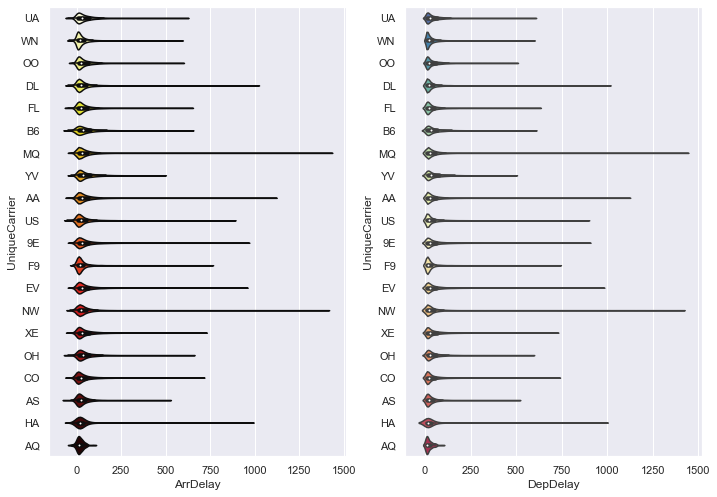

In [91]:
# Violinplot
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.violinplot(x=flights3_df['ArrDelay'], y=flights3_df['UniqueCarrier'], palette="hot_r")
plt.subplot(1, 2, 2)
sns.violinplot(x=flights3_df['DepDelay'], y=flights3_df['UniqueCarrier'], palette="Spectral_r")
plt.savefig('exercici1_fig17.png', bbox_inches='tight')

In [45]:
AA_flights = flights3_df[(flights3_df['ArrDelay']<=2000) & (flights3_df['DepDelay']<=2000) & (flights3_df['UniqueCarrier']=='AA')]
AA_flights

,UniqueCarrier,AirTime,ArrDelay,DepDelay
791037,AA,148.0,41.0,42.0
125169,AA,89.0,12.0,25.0
852696,AA,152.0,13.0,25.0
614335,AA,161.0,36.0,25.0
1753912,AA,39.0,16.0,27.0
...,...,...,...,...
776810,AA,160.0,91.0,18.0
914218,AA,39.0,16.0,25.0
363777,AA,123.0,-1.0,8.0
14950,AA,117.0,-21.0,8.0


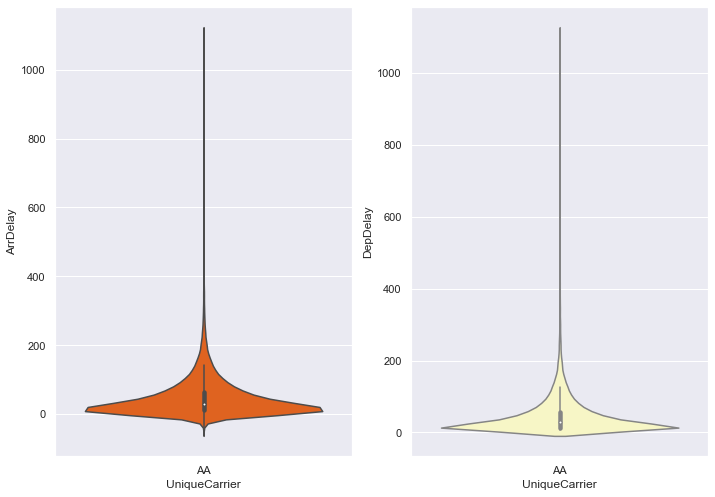

In [92]:
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.violinplot(x=AA_flights['UniqueCarrier'], y=AA_flights['ArrDelay'], palette="hot_r")
plt.subplot(1, 2, 2)
sns.violinplot(x=AA_flights['UniqueCarrier'], y=AA_flights['DepDelay'], palette="Spectral_r")
plt.savefig('exercici1_fig18.png', bbox_inches='tight')

In [52]:
# Aerolineas con más de 10.000 vuelos en 2008
largest_airlines = flights3_df[flights3_df.UniqueCarrier.isin(["AA","WN","MQ","UA","OO","DL","XE"])]
largest_airlines

,UniqueCarrier,AirTime,ArrDelay,DepDelay
163263,UA,127.0,206.0,113.0
1218054,WN,54.0,30.0,30.0
1505690,OO,24.0,46.0,48.0
805757,WN,49.0,109.0,113.0
839983,DL,240.0,74.0,55.0
...,...,...,...,...
89003,AA,122.0,395.0,381.0
17344,WN,95.0,97.0,111.0
1069600,WN,45.0,17.0,25.0
1810812,OO,87.0,16.0,29.0


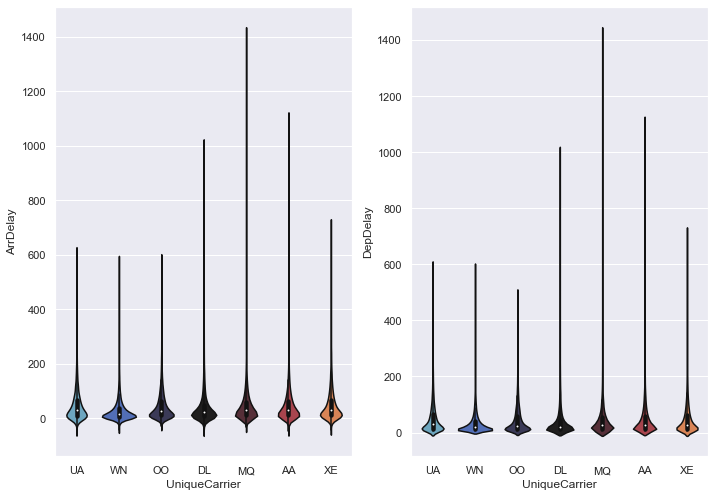

In [93]:
plt.subplot(1, 2, 1)
sns.violinplot(x=largest_airlines['UniqueCarrier'], y=largest_airlines['ArrDelay'], palette="icefire")
plt.subplot(1, 2, 2)
sns.violinplot(x=largest_airlines['UniqueCarrier'], y=largest_airlines['DepDelay'], palette="icefire")
plt.savefig('exercici1_fig19.png', bbox_inches='tight')

In [47]:
#Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

In [64]:
numeric_variables = flights3_df[['ArrDelay','DepDelay','AirTime']].copy()
numeric_variables

,ArrDelay,DepDelay,AirTime
163263,206.0,113.0,127.0
1218054,30.0,30.0,54.0
1505690,46.0,48.0,24.0
805757,109.0,113.0,49.0
839983,74.0,55.0,240.0
...,...,...,...
515779,47.0,45.0,143.0
1810812,16.0,29.0,87.0
262335,21.0,40.0,189.0
1381857,35.0,21.0,52.0


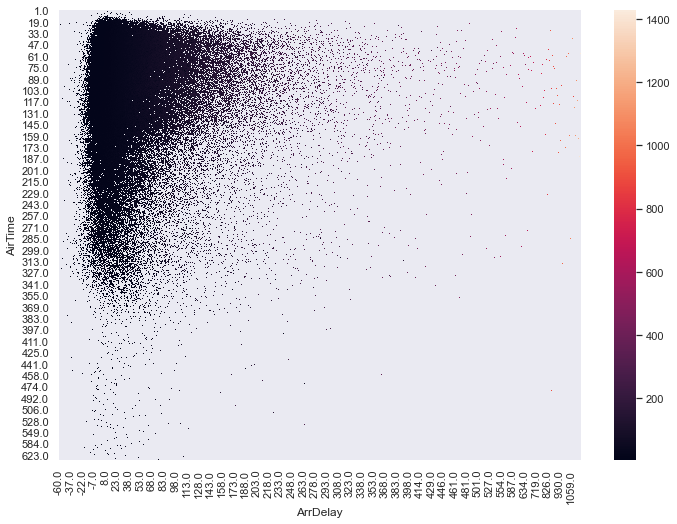

In [94]:
# Heatmap
df_wide = numeric_variables.pivot_table( index='AirTime', columns='ArrDelay', values='DepDelay')
sns.heatmap(df_wide)
plt.savefig('exercici1_fig20.png', bbox_inches='tight')

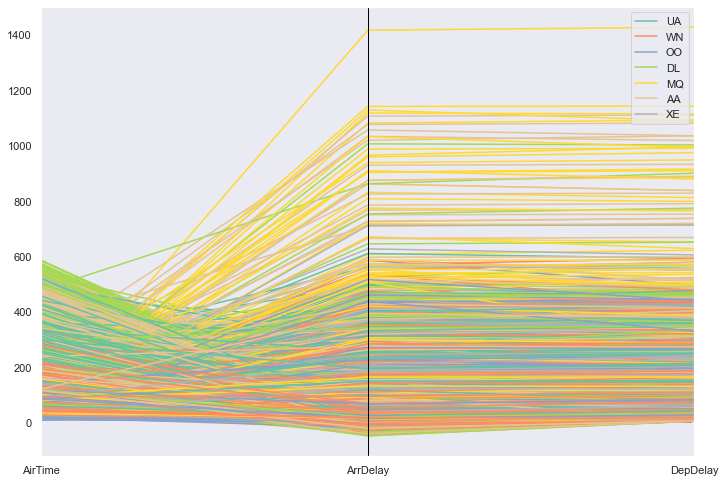

In [95]:
# Parallel Coordinates
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

parallel_coordinates(largest_airlines, 'UniqueCarrier', colormap=plt.get_cmap("Set2") )
plt.savefig('exercici1_fig21.png', bbox_inches='tight')
#plt.show()

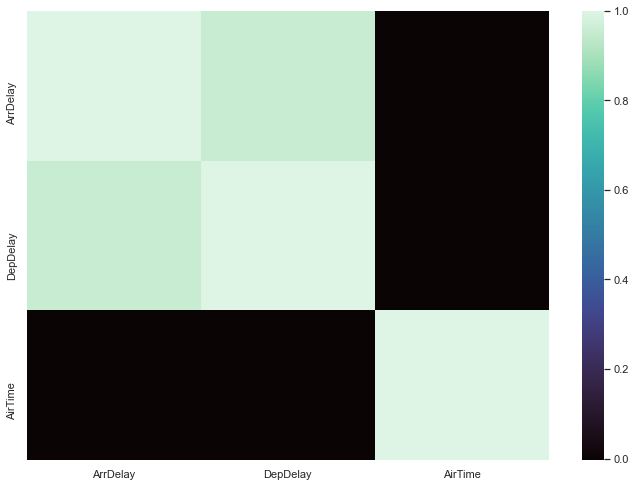

In [96]:
# Correlation Matrix
corr_matrix=numeric_variables.corr()
sns.heatmap(corr_matrix, cmap='mako')
plt.savefig('exercici1_fig22.png', bbox_inches='tight')

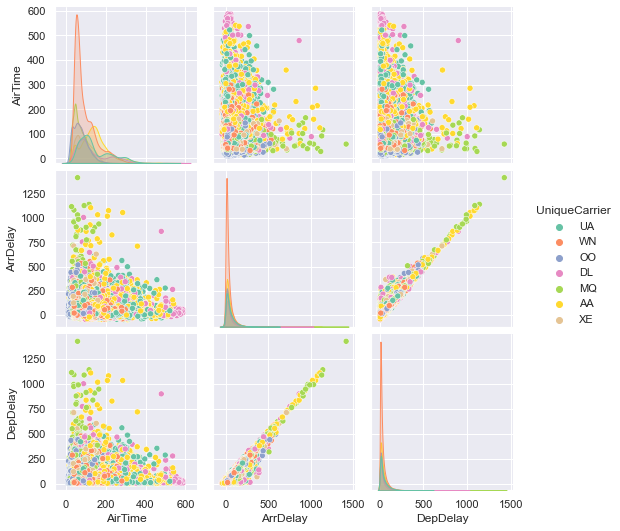

In [97]:
sns.pairplot(largest_airlines, kind="scatter", hue="UniqueCarrier", palette="Set2")
plt.savefig('exercici1_fig23.png', bbox_inches='tight')
#plt.show()

In [48]:
# - Exercici 2
# Exporta els gràfics com imatges o com html.

Los gráficos fueron exportados como imágenes al largo del notebook.
Fue utilizado el comando "plt.savefig()" para exportar los gráficos.
Fueron generados el total de 23 gráficos. Los archivos fueron enviados al GitHub

In [49]:
# - Exercici 3
# Exporta el data set net i amb les noves columnes a Excel.

In [99]:
# Fueron generados diferentes Datasets al largo del exercício 1. El principal Dataaset utilizado fue:
flights3_df.to_csv('sample_flights_eduardobaffi.csv')

print('DataFrame exportado a CSV!')

DataFrame exportado a CSV!


In [50]:
# - Exercici 4
# Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.

Fue generado un nuevo Notebook de la tasca 5, del Sprint 3, que integra los gráficos.